<a href="https://colab.research.google.com/github/FaOliRi/BootcampDataScience/blob/master/Trabalho_Pr%C3%A1tico_do_M%C3%B3dulo_1_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas


In [6]:
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

Gerando os dados

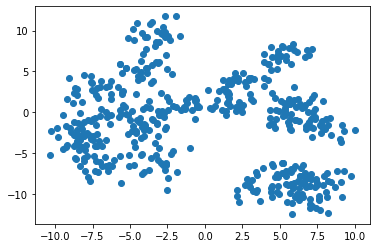

In [7]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])

In [9]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

Número de Clusters Necessários

In [10]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)

4


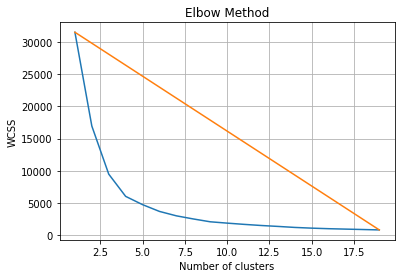

In [12]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Execução do Kmeans

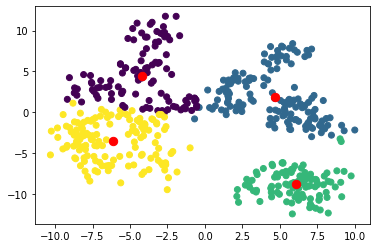

In [18]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0],X[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()